<a href="https://colab.research.google.com/github/KlayClarke/tf--experimentation/blob/main/learning/tf/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!pip install -q tensorflow

In [40]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [41]:
# other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-05-27 12:13:15--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.2’

moore.csv.2         100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-05-27 12:13:15 (24.6 MB/s) - ‘moore.csv.2’ saved [2302/2302]



In [43]:
# load data
data = pd.read_csv("moore.csv", header=None).values
X = data[:,0].reshape(-1,1) # make it a 2d array
Y = data[:,1]

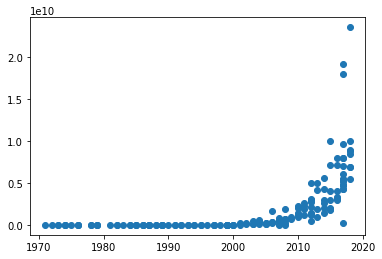

In [44]:
# plot the data (exp)
plt.scatter(X,Y)

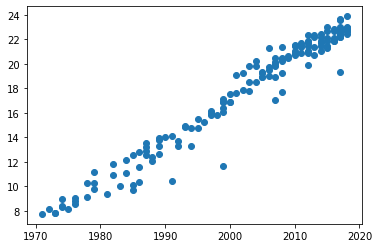

In [45]:
# since we desire a linear model, lets take the log
Y = np.log(Y)
plt.scatter(X, Y)

In [46]:
# center X data around 0 so that values don't get too large
X = X - X.mean()

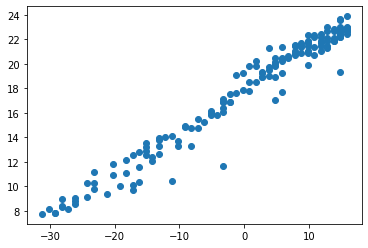

In [47]:
plt.scatter(X,Y)

In [48]:
# create tf model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(1,)),
                                    tf.keras.layers.Dense(1)
])

In [49]:
# configure model for training
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9), loss="mse")

In [50]:
# create learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

In [51]:
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [52]:
# train model
r = model.fit(X,Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 5ms/step - loss: 312.9454 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 291.5762 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 261.2805 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 217.5959 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 194.0748 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 156.3040 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 127.1294 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 108.3783 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 65.6118 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 47.1215 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 5ms/step - loss:

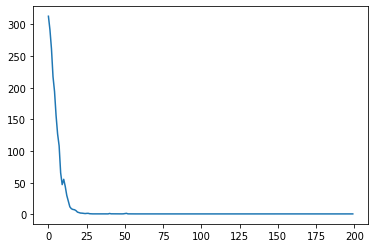

In [53]:
# plot the loss
plt.plot(r.history["loss"], label="loss")

In [54]:
model.layers

In [55]:
model.layers[0].get_weights()

[array([[0.33564973]], dtype=float32), array([17.762669], dtype=float32)]

In [56]:
# get the slope of the line
a = model.layers[0].get_weights()[0][0,0]
a

0.33564973

In [57]:
# time to double transistor
print("Time to double:", np.log(2)/a)

Time to double: 2.0650908406499573


## Making Predictions

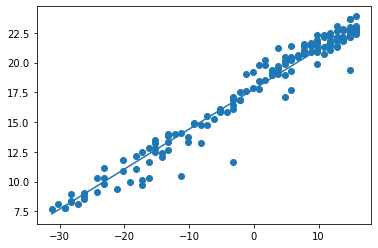

In [59]:
# plot line of best fit

Yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X, Yhat)

In [60]:
# manual calculations

# get the weights
w, b = model.layers[0].get_weights()

In [61]:
# reshape x because we flattened it 
X = X.reshape(-1,1)

In [62]:
# (N x 1) x (1 x 1) + (1) --> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

In [63]:
# don't use == for floating points (round off error, but luckily numpy has a method to assist us)
np.allclose(Yhat, Yhat2)

True

In [64]:
Yhat

array([ 7.2912254,  7.626876 ,  7.9625254,  7.9625254,  8.298175 ,
        8.298175 ,  8.298175 ,  8.633824 ,  8.969475 ,  8.969475 ,
        8.969475 ,  9.640774 ,  9.640774 ,  9.976423 ,  9.976423 ,
        9.976423 , 10.647723 , 10.983373 , 10.983373 , 11.319023 ,
       11.654673 , 11.654673 , 11.990322 , 11.990322 , 11.990322 ,
       12.325972 , 12.325972 , 12.325972 , 12.661621 , 12.661621 ,
       12.661621 , 12.661621 , 12.997271 , 12.997271 , 13.332921 ,
       13.332921 , 13.332921 , 13.332921 , 13.6685705, 14.004221 ,
       14.004221 , 14.33987  , 14.33987  , 14.67552  , 14.67552  ,
       15.011169 , 15.011169 , 15.346819 , 16.689419 , 15.346819 ,
       15.682469 , 16.01812  , 16.01812  , 16.01812  , 16.35377  ,
       16.689419 , 16.689419 , 17.025068 , 17.025068 , 16.689419 ,
       16.689419 , 16.689419 , 17.025068 , 17.360718 , 17.360718 ,
       17.696367 , 18.367666 , 18.367666 , 18.703316 , 19.038967 ,
       18.703316 , 19.038967 , 19.374617 , 19.710266 , 18.0320

In [65]:
Yhat2

array([ 7.29122584,  7.62687557,  7.96252529,  7.96252529,  8.29817502,
        8.29817502,  8.29817502,  8.63382475,  8.96947448,  8.96947448,
        8.96947448,  9.64077394,  9.64077394,  9.97642367,  9.97642367,
        9.97642367, 10.64772312, 10.98337285, 10.98337285, 11.31902258,
       11.65467231, 11.65467231, 11.99032204, 11.99032204, 11.99032204,
       12.32597177, 12.32597177, 12.32597177, 12.6616215 , 12.6616215 ,
       12.6616215 , 12.6616215 , 12.99727123, 12.99727123, 13.33292095,
       13.33292095, 13.33292095, 13.33292095, 13.66857068, 14.00422041,
       14.00422041, 14.33987014, 14.33987014, 14.67551987, 14.67551987,
       15.0111696 , 15.0111696 , 15.34681933, 16.68941824, 15.34681933,
       15.68246906, 16.01811878, 16.01811878, 16.01811878, 16.35376851,
       16.68941824, 16.68941824, 17.02506797, 17.02506797, 16.68941824,
       16.68941824, 16.68941824, 17.02506797, 17.3607177 , 17.3607177 ,
       17.69636743, 18.36766689, 18.36766689, 18.70331661, 19.03